In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading the csv file using pandas
df = pd.read_csv('auto-mpg.csv', na_values='?', skipinitialspace=True)
df = df.drop('car name', axis=1)
data = df.copy()

In [ ]:
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


# **Exploratory Data Analysis**

    1.Check for Data type of columns
    2.Check for null values.
    3.Check for outliers
    4.Look for the category distribution in categorical columns
    5.Plot for correlation
    6.Look for new variables


In [ ]:
#checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [ ]:
#checking null values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
# statistics summary of vaariables
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


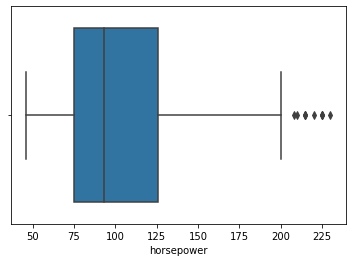

In [ ]:
#chcking the outliers in Horsepower feature using Boxplot
sns.boxplot(x=data['horsepower'])

In [ ]:
#replacing the null values by median
median_hp = data['horsepower'].median()
data['horsepower'] = data['horsepower'].fillna(median_hp)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [ ]:
# checking category distribution
data['cylinders'].value_counts() / len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: cylinders, dtype: float64

In [ ]:
data['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

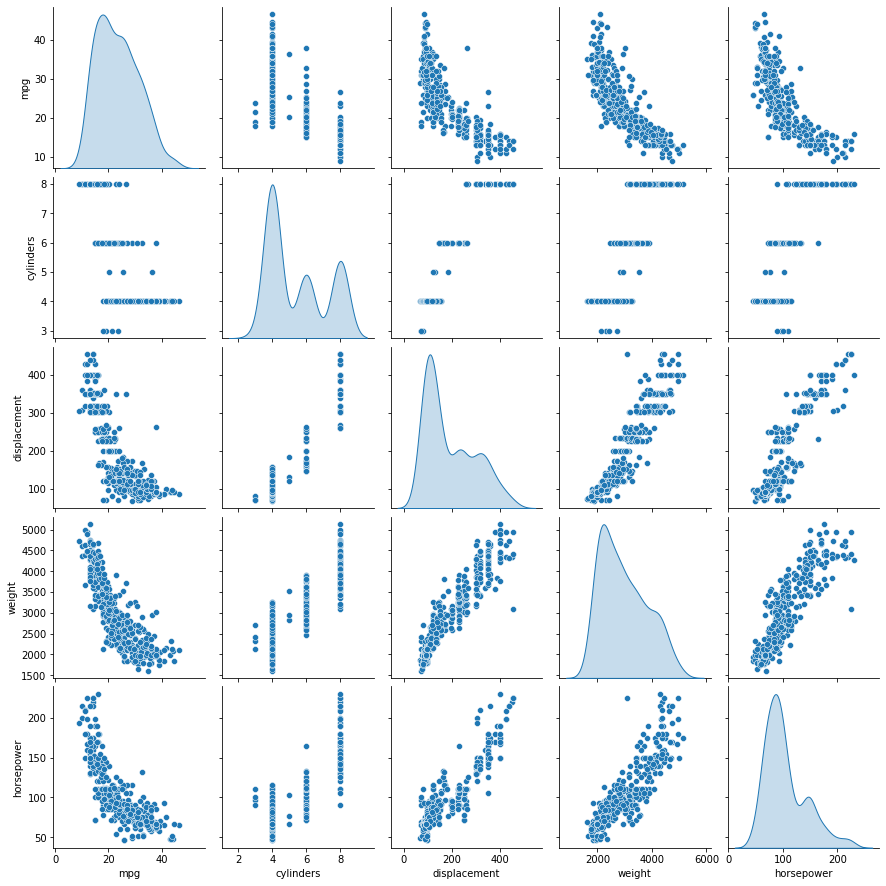

In [ ]:
# pairplots to get an intuition of potential correlations
sns.pairplot(data[["mpg", "cylinders", "displacement", "weight", "horsepower"]], diag_kind = "kde")

**Splitting data into train and test sets**

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
train_data['cylinders'].value_counts() / len(train_data)

4    0.509434
8    0.248428
6    0.220126
3    0.012579
5    0.009434
Name: cylinders, dtype: float64

In [ ]:
test_data['cylinders'].value_counts() / len(test_data)

4    0.525
8    0.300
6    0.175
Name: cylinders, dtype: float64

**Stratified Sampling**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['cylinders']):
  strat_train_data = data.loc[train_index]
  strat_test_data = data.loc[test_index]

In [ ]:
#checking for cylinder category distribution in training set
strat_train_data['cylinders'].value_counts() / len(strat_train_data)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: cylinders, dtype: float64

In [ ]:
#checking for cylinder category distribution in test set
strat_test_data['cylinders'].value_counts() / len(strat_test_data)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: cylinders, dtype: float64

In [ ]:
  train_data['origin'] = train_data['origin'].map({1: 'India', 2: 'USA', 3:'Germany'})
  train_data.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
3,16.0,8,304.0,150.0,3433,12.0,70,India
18,27.0,4,97.0,88.0,2130,14.5,70,Germany
376,37.0,4,91.0,68.0,2025,18.2,82,Germany
248,36.1,4,91.0,60.0,1800,16.4,78,Germany
177,23.0,4,115.0,95.0,2694,15.0,75,USA


In [ ]:
train_data = pd.get_dummies(train_data, prefix='', prefix_sep='')
train_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Germany,origin_India,origin_USA
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0
18,27.0,4,97.0,88.0,2130,14.5,70,1,0,0
376,37.0,4,91.0,68.0,2025,18.2,82,1,0,0
248,36.1,4,91.0,60.0,1800,16.4,78,1,0,0
177,23.0,4,115.0,95.0,2694,15.0,75,0,0,1


In [ ]:
data = strat_train_data.copy()

**Correlation between features and target- MPG**

In [ ]:
correlation_matrix = data.corr()
correlation_matrix['mpg'].sort_values(ascending = False)

mpg             1.000000
origin          0.582654
model year      0.577636
acceleration    0.411989
cylinders      -0.765693
horsepower     -0.776055
displacement   -0.800063
weight         -0.822723
Name: mpg, dtype: float64

**Creating new variables and checking their correlation with MPG**

In [ ]:
data['acceleration_on_power'] = data['acceleration'] / data['horsepower']
data['acceleration_on_cylinder'] = data['acceleration'] / data['cylinders']
data['displacement_on_power'] = data['displacement'] / data['horsepower']
data['weight_on_cylinder'] = data['weight'] / data['cylinders']

corr_matrix = data.corr()
corr_matrix['mpg'].sort_values(ascending=False)

mpg                         1.000000
acceleration_on_cylinder    0.718888
acceleration_on_power       0.696610
origin                      0.582654
model year                  0.577636
acceleration                0.411989
weight_on_cylinder          0.002289
displacement_on_power      -0.564561
cylinders                  -0.765693
horsepower                 -0.776055
displacement               -0.800063
weight                     -0.822723
Name: mpg, dtype: float64

**Since the correlation between mpg and acceleration_on_cylinder and acceleration_on_power is more, these variables can be added in the data**